In [ ]:
!pip install beautifulsoup4
!pip install matplotlib
!pip install networkx

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from bs4 import BeautifulSoup
import requests

In [6]:
example_html_state = """BeautifulSoup
<DOCTYPE html>
<html>
<body>
<p>This is a paragraph.</p>
<div>
  <p>This is a nested paragraph.</p>    
</div>
<div>
<div>
<button>Click me</button>
<a>Click me</a>
</div>
</div>
</body>
</html>
"""

In [7]:
# Recurrsively traverse the DOM (that is your tree of elements)
def traverse_dom(element, index=0):
    print(" " * index + element.name)
    for child in element.children:
        if child.name is not None: 
            traverse_dom(child, index + 2)

# Example doc traversal
soup = BeautifulSoup(example_html_state, 'html.parser')
traverse_dom(soup)

[document]
  doctype
    html
      body
        p
        div
          p
        div
          div
            button


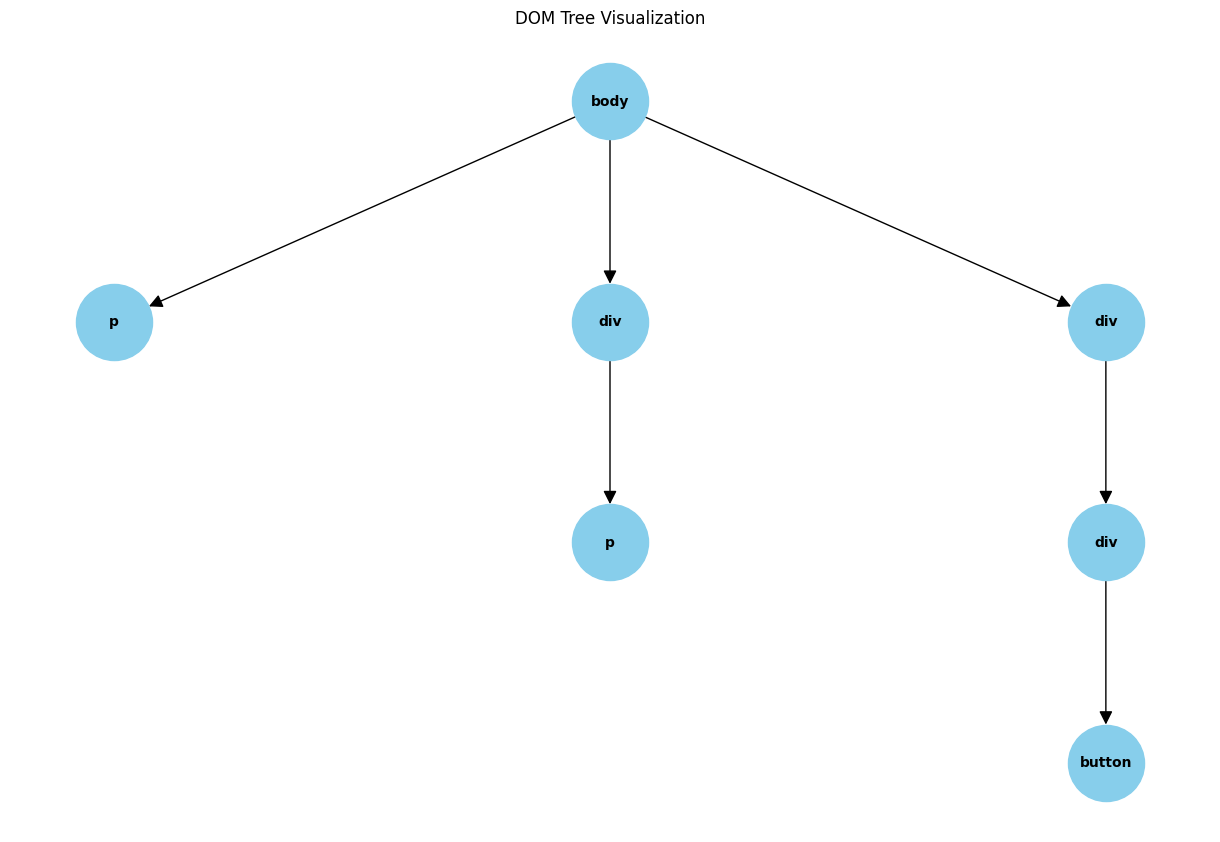

In [8]:
def add_edges(graph, element, parent=None):
    if element.name:
        if parent:
            graph.add_edge(parent, element)
        for child in element.children:
            if child.name:
                add_edges(graph, child, element)

def hierarchy_pos(G, root=None, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    pos = _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)
    return pos

def _hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5, pos=None, parent=None, parsed=[]):
    if pos is None:
        pos = {root: (xcenter, vert_loc)}
    else:
        pos[root] = (xcenter, vert_loc)
    
    children = list(G.neighbors(root))
    if not isinstance(G, nx.DiGraph) and parent is not None:
        children.remove(parent)
    
    if len(children) != 0:
        dx = width / len(children)
        nextx = xcenter - width/2 - dx/2
        for child in children:
            nextx += dx
            pos = _hierarchy_pos(G, child, width=dx, vert_gap=vert_gap, vert_loc=vert_loc-vert_gap, xcenter=nextx, pos=pos, parent=root, parsed=parsed)
    
    return pos

soup = BeautifulSoup(example_html_state, 'html.parser')
body = soup.body
G = nx.DiGraph()

add_edges(G, body)
pos = hierarchy_pos(G, body)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, labels={node: node.name for node in G.nodes()}, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
plt.title("DOM Tree Visualization")
plt.show()